In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from utility_functions import *

In [2]:
df = pd.read_csv('../../Data/data_16_runs/axial_velocity.csv')
df.head()

,z,Q,RPM,axial_velocity
0,0.004722,5,45.0,0.003191
1,0.010347,5,45.0,0.003165
2,0.015973,5,45.0,0.003139
3,0.021597,5,45.0,0.003113
4,0.027219,5,45.0,0.003087


In [3]:
df.shape

(3077, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   z               3077 non-null   float64
 1   Q               3077 non-null   int64  
 2   RPM             3077 non-null   float64
 3   axial_velocity  3077 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 96.3 KB


In [5]:
valid1 = df[(df['Q'] == 3) & (df['RPM'] == 55)]
valid2 = df[(df['Q'] == 3) & (df['RPM'] == 75)]
valid3 = df[(df['Q'] == 4) & (df['RPM'] == 45)]

valid_data = pd.concat([valid1, valid2, valid3], axis=0)
valid_data.head()

,z,Q,RPM,axial_velocity
1448,0.004722,3,55.0,0.002755
1449,0.010347,3,55.0,0.002735
1450,0.015973,3,55.0,0.002715
1451,0.021597,3,55.0,0.002695
1452,0.027219,3,55.0,0.002675


In [6]:
valid_data.shape

(543, 4)

In [7]:
valid_idx = valid_data.index.to_list()

In [8]:
train_data = df.drop(valid_idx, axis=0)
train_data.shape

(2534, 4)

In [9]:
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

In [10]:
X_train = train_data.drop(['axial_velocity'], axis=1)
y_train = train_data['axial_velocity']

X_valid = valid_data.drop(['axial_velocity'], axis=1)
y_valid = valid_data['axial_velocity']

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(2534, 3) (2534,) (543, 3) (543,)


The train NRMSE is: 0.027265974553429134
The valid NRMSE is: 0.049519011545492035


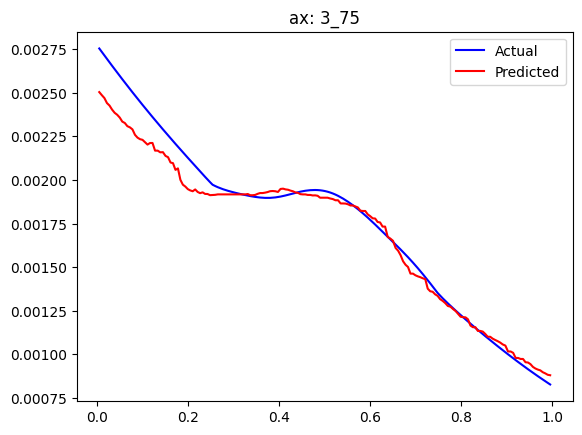

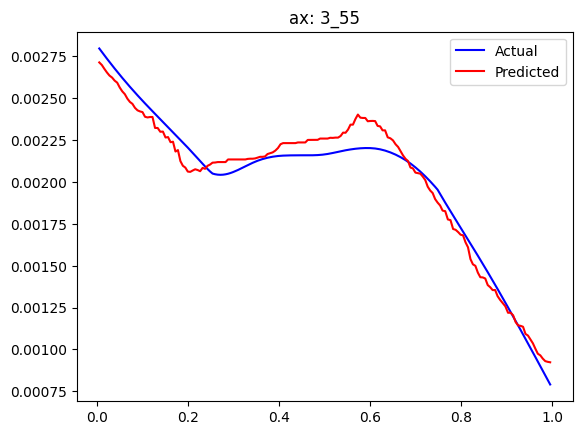

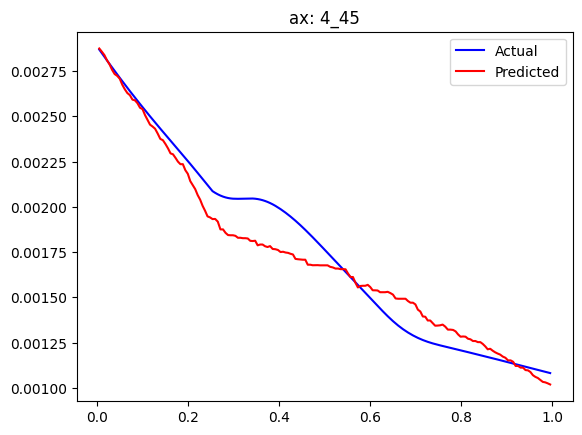

In [26]:
model = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 200, subsample = 0.8, max_features = 2,
                                  min_samples_split = 36, random_state = 42)

check_performance(model, X_train, y_train, X_valid, y_valid)

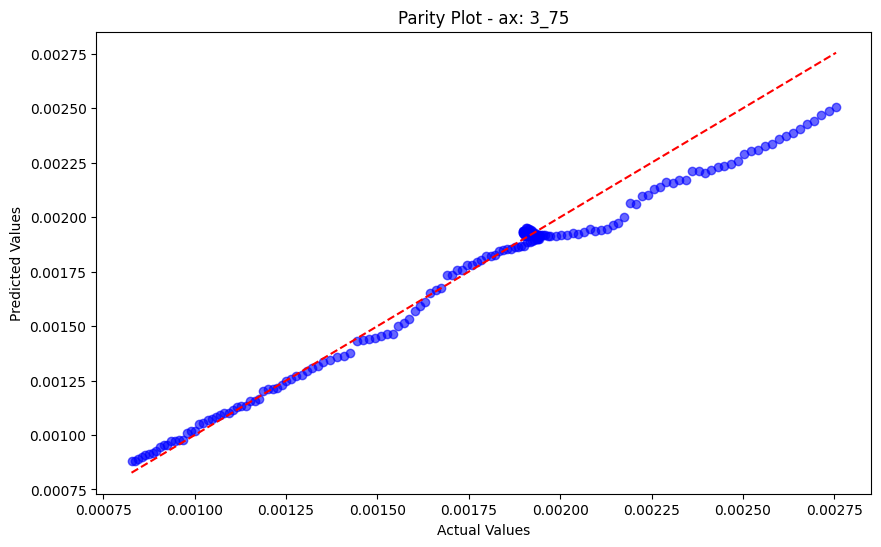

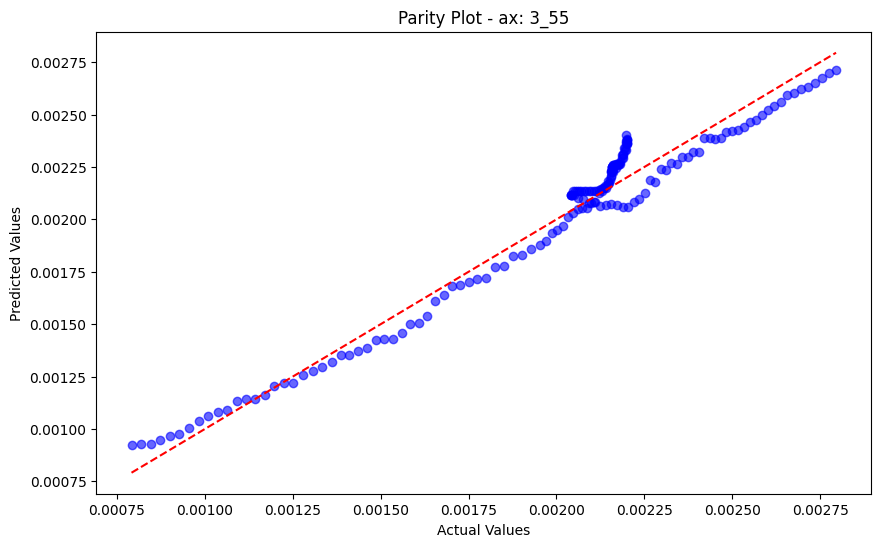

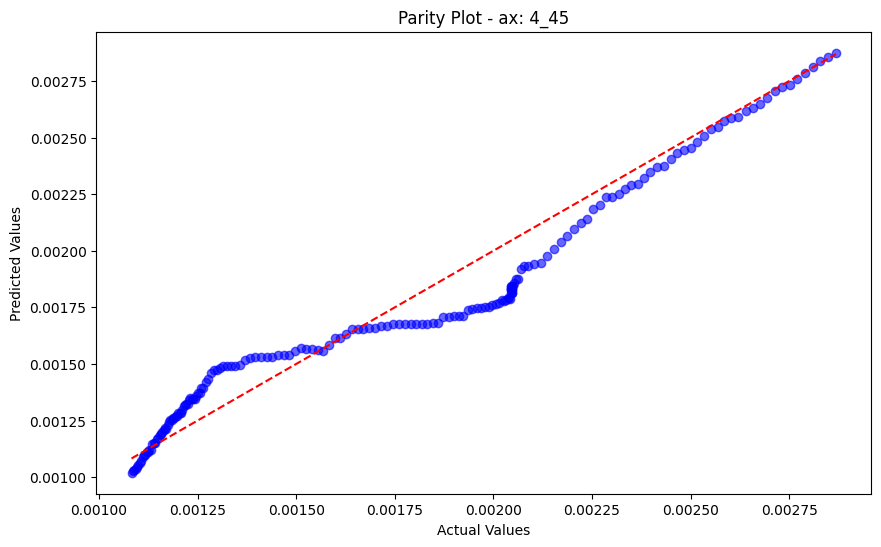

In [27]:
valid_cols = ['ax: 3_75', 'ax: 3_55', 'ax: 4_45']
plot_parity(model, X_train, X_valid, y_valid, valid_cols)

In [28]:
y_pred = model.predict(X_valid)

axial_velocity_predictions = pd.DataFrame({'z': valid_data['z'],
                                           'Q': valid_data['Q'],
                                           'RPM': valid_data['RPM'],
                                           'axial_velocity': y_pred})

axial_velocity_predictions.head()

,z,Q,RPM,axial_velocity
0,0.004722,3,55.0,0.002505
1,0.010347,3,55.0,0.002487
2,0.015973,3,55.0,0.002471
3,0.021597,3,55.0,0.002442
4,0.027219,3,55.0,0.002427


In [29]:
axial_velocity_predictions.shape

(543, 4)

In [30]:
valid_data.head()

,z,Q,RPM,axial_velocity
0,0.004722,3,55.0,0.002755
1,0.010347,3,55.0,0.002735
2,0.015973,3,55.0,0.002715
3,0.021597,3,55.0,0.002695
4,0.027219,3,55.0,0.002675


In [31]:
axial_velocity_predictions.to_csv('../../Data/data_16_runs/axial_velocity_predictions.csv', index=False)

The train NRMSE is: 0.026963680923758327
The valid NRMSE is: 0.053597097049829893


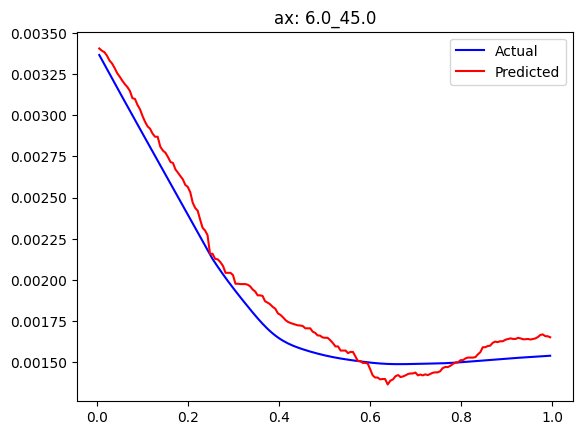

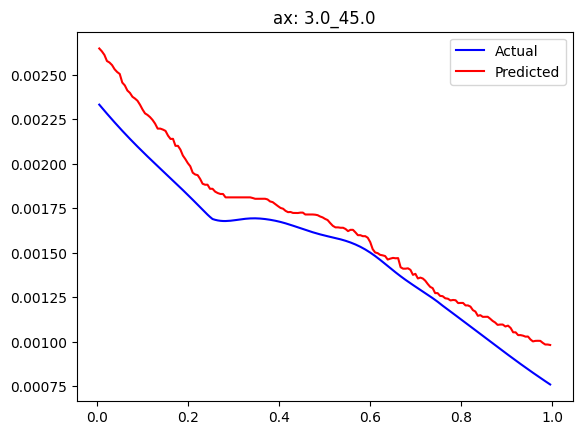

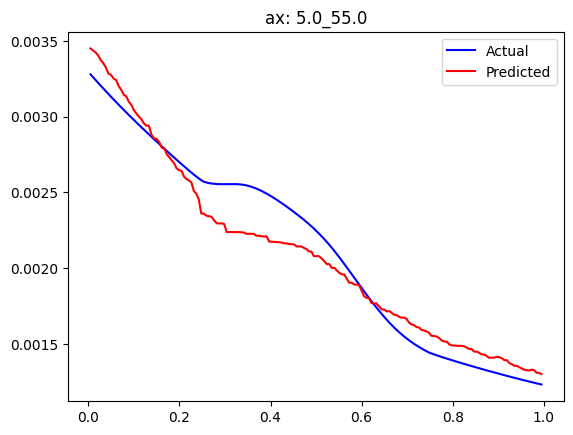

In [12]:
random_predictions(df)

In [11]:
valid_cols = ['3_55', '3_75', '4_45']

The train NRMSE is: 0.02750436813698185
The valid NRMSE is: 0.05048905810010909


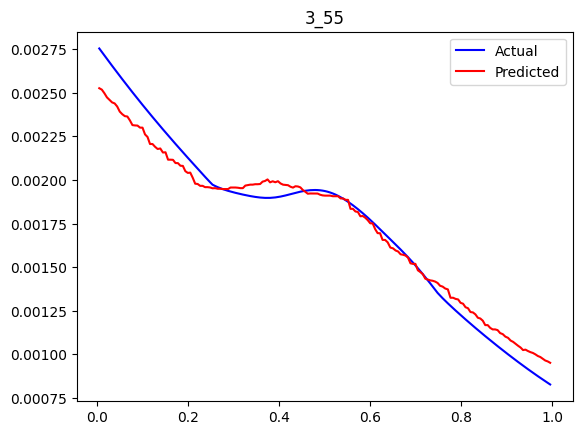

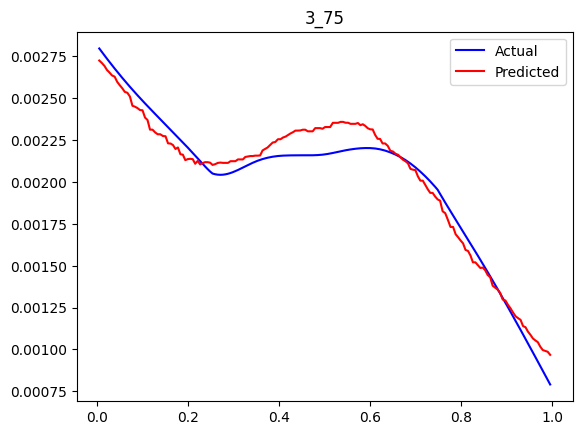

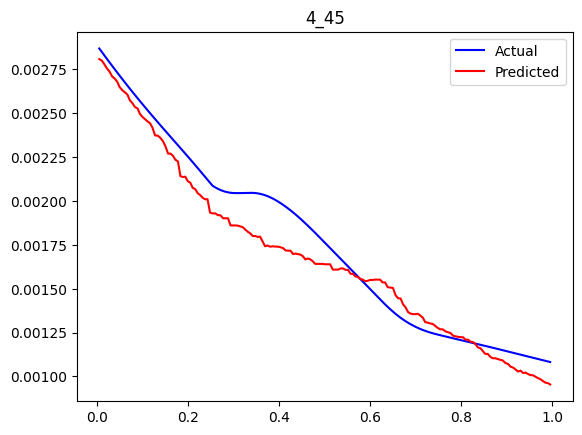

In [12]:
model = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 200, subsample = 0.8, max_features = 2,
                                  min_samples_split = 36, random_state = 42)

check_performance(model, X_train, y_train, X_valid, y_valid, valid_cols)

The train NRMSE is: 0.027590575491542105
The valid NRMSE is: 0.05117878867706052


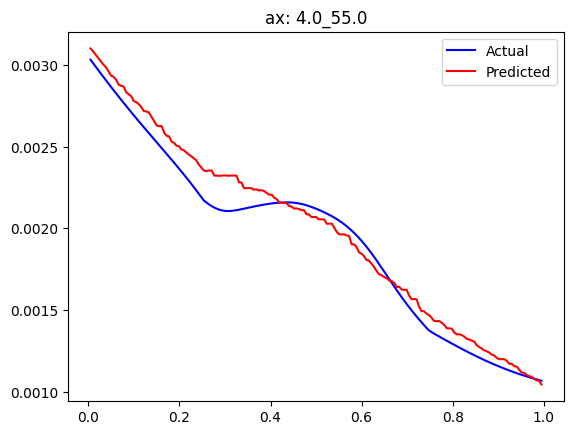

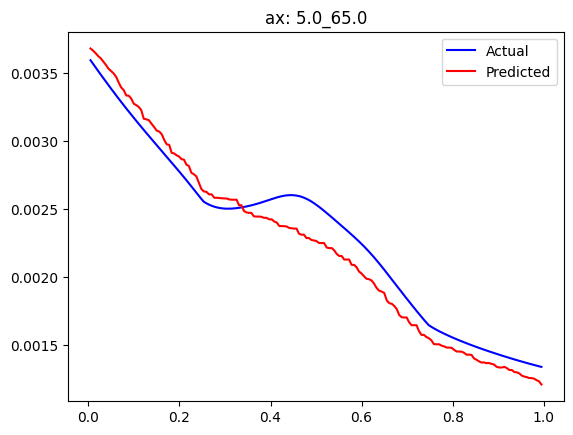

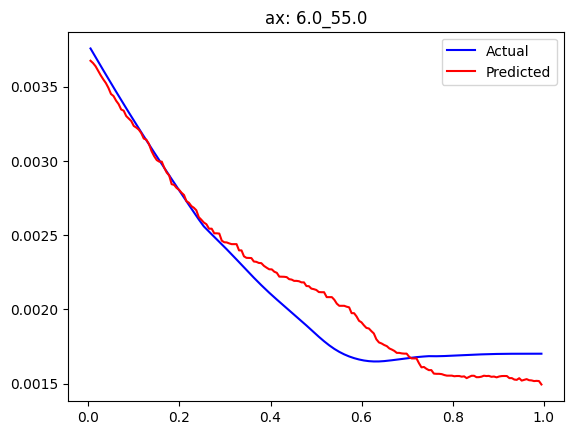

In [13]:
random_predictions(df, 'axial_velocity')